<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Production-and-Operations-Management/blob/main/Southern_Textile_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 의사결정 기준 정리
1. Maximax: 각 대안의 최대 이익(payoff) 중 가장 큰 것을 선택
2. Maximin: 각 대안의 최소 이익 중 가장 큰 것을 선택
3. Minimax Regret: 각 대안의 후회 값 중 가장 작은 것을 선택
4. Hurwicz: 낙관주의 계수(α)를 이용해 가중평균을 구함
5. Equal Likelihood (LaPlace): 각 상태가 동일한 확률을 가진다고 가정하고, 평균 이익을 구함

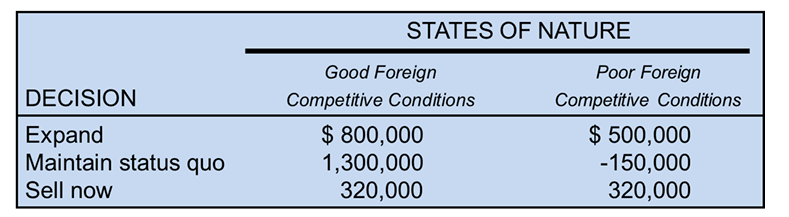

In [6]:
import numpy as np
import pandas as pd

# Payoff Table 정의
data = {
    'Good Foreign Conditions': [800000, 1300000, 320000],
    'Poor Foreign Conditions': [500000, -150000, 320000]
}

decisions = ['Expand', 'Maintain status quo', 'Sell now']

payoff_table = pd.DataFrame(data, index=decisions)

print("Payoff Table:")
print(payoff_table)

# 1. Maximax 기준
def maximax(payoff_table):
    max_payoffs = payoff_table.max(axis=1)
    return max_payoffs.idxmax(), max_payoffs.max()

# 2. Maximin 기준
def maximin(payoff_table):
    min_payoffs = payoff_table.min(axis=1)
    return min_payoffs.idxmax(), min_payoffs.max()

# 3. Minimax Regret 기준
def minimax_regret(payoff_table):
    max_in_columns = payoff_table.max(axis=0)
    regret_table = max_in_columns - payoff_table
    max_regrets = regret_table.max(axis=1)
    return max_regrets.idxmin(), max_regrets.min()

# 4. Hurwicz 기준
def hurwicz(payoff_table, alpha=0.3):  # 낙관주의 계수(alpha)를 0.3으로 설정
    max_payoffs = payoff_table.max(axis=1)
    min_payoffs = payoff_table.min(axis=1)
    hurwicz_values = alpha * max_payoffs + (1 - alpha) * min_payoffs
    return hurwicz_values.idxmax(), hurwicz_values.max()

# 5. Equal Likelihood (LaPlace) 기준
def equal_likelihood(payoff_table):
    avg_payoffs = payoff_table.mean(axis=1)
    return avg_payoffs.idxmax(), avg_payoffs.max()

# 결과 출력
maximax_decision, maximax_value = maximax(payoff_table)
print(f"Maximax 기준: {maximax_decision}, Payoff: {maximax_value}")

maximin_decision, maximin_value = maximin(payoff_table)
print(f"Maximin 기준: {maximin_decision}, Payoff: {maximin_value}")

minimax_decision, minimax_value = minimax_regret(payoff_table)
print(f"Minimax Regret 기준: {minimax_decision}, Regret: {minimax_value}")

hurwicz_decision, hurwicz_value = hurwicz(payoff_table, alpha=0.3)
print(f"Hurwicz 기준: {hurwicz_decision}, Payoff: {hurwicz_value}")

equal_decision, equal_value = equal_likelihood(payoff_table)
print(f"Equal Likelihood 기준: {equal_decision}, Payoff: {equal_value}")


Payoff Table:
                     Good Foreign Conditions  Poor Foreign Conditions
Expand                                800000                   500000
Maintain status quo                  1300000                  -150000
Sell now                              320000                   320000
Maximax 기준: Maintain status quo, Payoff: 1300000
Maximin 기준: Expand, Payoff: 500000
Minimax Regret 기준: Expand, Regret: 500000
Hurwicz 기준: Expand, Payoff: 590000.0
Equal Likelihood 기준: Expand, Payoff: 650000.0


* Maximax 기준: 낙관적인 관점에서 결정하는 방법입니다. 여기서는 "Maintain status quo"가 최대 이익을 가져옵니다.

  - Payoff: 1,300,000

* Maximin 기준: 가장 비관적인 관점에서 결정하는 방법으로, 각 대안에서 최악의 상황에서의 최소 이익 중 최대값을 선택합니다. 여기서는 "Expand"가 선택됩니다.

  - Payoff: 500,000

* Minimax Regret 기준: 후회 값이 가장 작은 대안을 선택하는 방법입니다. 후회 값이란, 선택하지 않은 대안이 얼마나 더 좋은 결과를 가져왔을지를 계산한 값입니다. 여기서는 "Expand"가 최소 후회를 가집니다.

  - Regret: 500,000

* Hurwicz 기준: 낙관주의 계수(α)를 사용하여 가중 평균을 구하는 방법입니다. 이 예제에서는 α = 0.3으로 설정하여 "Maintain status quo"가 선택되었습니다.

  - Payoff: 590000

* Equal Likelihood (LaPlace) 기준: 각 상태가 동일한 확률을 가진다고 가정하고 평균 이익을 계산하는 방법입니다. 여기서는 "Expand"가 선택되었습니다.

  - Payoff: 650,000